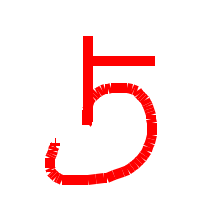

In [1]:
from PIL import Image
from io import BytesIO
import base64

data = "iVBORw0KGgoAAAANSUhEUgAAAMgAAADICAYAAACtWK6eAAARAElEQVR4Xu2de8g9RRnHP1tgZEqKmqamVlqEeEntoqUmlZpKZRQFalJEdvnDTMsuf6h/qaXlX2o3QruQCKnhHcJLmkZpXgKpTNS8ZCoaplFQG8/vzMq67p4zu+d5z7uz8114eS9n9pmZ7zOfd+4zBXqkgBToVKCQNlJACnQrIEBUOqTAHAUEiIqHFBAgKgNSYJgCqkGG6aa3MlFAgGTiaGVzmAICZJhueisTBQRIJo5WNocpIECG6aa3MlFAgGTiaGVzmAICZJhueisTBQRIJo5WNocpIECG6aa3MlFAgGTiaGVzmAICZJhueisTBQRIJo5WNocpIECG6aa3MlFAgGTiaGVzmAICZJhueisTBQRIJo5WNocpIECG6aa3MlFAgGTiaGVzmAICZJhueisTBQRIJo5WNocpIECG6aa3MlFAgGTiaGVzmAICZJhueisTBQRIJo5WNocpIECG6aa3MlFAgGTiaGVzmAICZJhueisTBQRIJo5WNocpIECG6aa3MlFAgGTiaGVzmAICZJhueisTBQSIo6NLKGPMFSDdY4QaQRg5ytEJAsRRzJGYEiCOjhAgjmKOxJQAcXSEAHEUcySmBIijIwSIo5gjMSVAHB0hQBzFHIkpAeLoCAHiKOZITAkQR0cIEEcxR2JKgDg6QoA4ijkSUwLE0RECxFHMkZgSII6OECCOYo7ElABxdIQAcRRzJKYEiKMjBIijmCMxJUAcHSFAHMUciSkB4ugIAeIo5khMCRBHRwgQRzFHYkqAODpCgDiKORJTAsTREQLEUcyRmBIgjo4QII5ijsSUAHF0hABxFHMkpgSIoyNiAXGMMilTKe7FFyCORUyAzBdTgDgWthRNCRABkmK5XVmaBYgAWVlhSzEiASJAUiy3K0uzABEgKytsKUYkQARIiuV2ZWkWIAJkZYUtxYgEiABJsdyuLM0CRICsrLClGFEsIClOmKXoD480aybdQ8VgQ4A4ijkSUwLE0RECxFHMkZgSII6OECCOYo7ElABxdIQAcRRzJKYEiKMjBIijmCMxJUAcHSFAHMUciSkB4ugIAeIo5khMCRBHRwgQRzFHYkqAODpCgDiKORJTAsTREQLEUcyRmBIgjo4QII5ijsSUAHF0hABxFHMkpgSIoyMEiKOYIzElQBwdIUAcxRyJKQHi6AgB4ijmSEwJEEdHCBBHMUdiSoA4OmKtASlhR+BI4JUFnBYb35wsbg9cCtxe/yrgv46yJG1KgDi6L7bALtpRGAHCnQXsGRvfnCy+H/hF4/OHCnhNCUcV8BNHeZI0JUAc3RZbYLsAKWEr4PPAKSFZ80DYE7hjyeSfCthX/TFgzgWuBh4FLgPOKOCBJeNK8nUB4ui2oYCUsA1wNrOmjX2vF/wuENoKd9/cGAxWi9Qfs7svcAjwDLBp+PC04sUw9Y0vufACxNFlQwAp4Xzgw8AWISnHACcBe4Tfu0C4sxZmaC4eBrZrvGy112ktBvcswOLM6hEgju7uA0gJBwOnA3s1kvB34ALgS1UzywGEPrm8ATgQ+Avw+npTz34u4WjgJQVc2MdoqmEFiKPnYgGx/9DWXCnhGmagPAJsW0vK5cARHUnzqDm6cv0EsGX48D7gdVXzKvRLrPlngDwJ7FrAY47yjdKUAHF0Sw9ALFZrxvyaGST2PA1sVkvOg8AOLcnz6Ht05dpqr1cBt4R+SBXu68Dx4bPqb3cXsLujfKM0JUAc3dITkAqSt4cO8d3AbrXkPAu8oiV5HqNXi3L941BTWLingM07XjivgM8tMpby5wLE0XsDALHY64Xxl8C75yXJhojL2ShX1Yl3zMEGU1aj2ahal/0muNcXcJB3IsZiT4A4eqIHINcD76pFXXWIr7O2faMp84IUBkBspOkfwCVD5ydKeGkYILBBAhvqtfRsDJwMnNkhy128sFlV5ePsYjbyNrlHgDi6tAcgFmsTkiol3wC+HH55LiwF+dpQEPpkz2bPgV1qE5XV69Y3uQn4UM1eM/2TrEkESJ8StCBsT0C6ILmW2eiQ/Yc/sYC/OSYxylQJ+wSArQ9kTUCbUa+GndvSPdmaRIBEFZm4QAMAaStsVhiPL+DiuFjXJlQJx4aZ/Z0bNcqLao5Gc3FSM+4CxLF89QDkR4DNmFdPVeiuLOBwxyQtZaqcLS2p1oXNqzmqeKr5nYMLsJow+UeAOLqwByA2UnRrs/CNcTSohLOsqdfSZ2rWJNW8joXdsoC9HaVdN1MCxFH6HoBYrDb5tlGAZNSjQCXY6Fp91K0Jh/VTbCWyLXCsnqOnsFxegKwfIBazLdvYJYVVsnNqkvqarbqat0+hFhEg6weIDeEemVJbvaUmWaTemQV8ZVGgMX8uQBy907OJlWThKeEK4LAFst0WPi9Sr0UEyPoA8mwBmzhGvVJT5Wz18atbIq3AqHfQk+6LCBDHotWjBrmogI85Rr1SU2HG3Trm1dMGho3U2XbdrVPoY3UJKEAci1YPQA4r4CrHqFduqgSDogwR12sMW8Jve0lsZXK14HGnVSyVWQsRBIijqj0A2aQAWxWb7FPCGWFhY5WHe22nYW2TVT1vJxRwToqZFSBOXmtpdnRaXnTsj1OS1txM6ItYX6o62KEtzj/ZjskxToLGCCRAYlSKDBNbg0wIkPOAz7TIswGKsI34DeHzJJtZAiSy8McEyxAQO+nx/qBNGxTJN7MESEzJjwgTC4eZmkoNYnkJk4d24ERVU0yqmSVAIgp/TJCMAfkC8O2pNrMESEzpjwiTMSCTbmYJkIjCHxMkV0B6NLPsPC/bQ992amOMxOsSRoA4yZ45IF3NrA1Q2L76VI8tFSACZGkFwnUN1WjWXHupDVAIkKWLx8xAzjVIn/wLEKcCl5oZAfL8uizVIKkV3lWkV4DEAQIktQ5NTSwnenIHJDSz7LqEA4D9w/fq+oS6ykmtZBYgAsRFgRJuBvaLMGbXuX01ItwogggQJzfkXoOUs8uAYvaf/7qAdzjJvuZmBIiTxLGApDaKEytPCe8DrmwJb6ee3Aj8yr4Xs5urknkEiJOrBMiGu0z+GSNnSv8kBEiMRyPC5A7IVOdCBEhE4V82SO2M20kd7NzUZYr/JATIsqU/8n2DJOXTPWKyKUBiVFKYbBUQINm6XhmPUUCAxKikMNkqIECydb0yHqOAAIlRSWGyVUCAZOt6ZTxGAQESo5LCZKuAAMnW9cr4IgVKtNRkkUb6PGMFtFgxY+cr64sV0HL3xRopRMYKhPtC9oqQQBumIkRaSRDrNKa0tHoloqxBJLX+x4OAfdmzQ/hqxqgtt2vgg0EmBcgg2Xq/NKf/0QaMDm3orfAavSBA1kjYhtkSfgZ8NCK25O5On/RydwESUWQdgpSznYS2o3DRk1T/wzIzKUCaey4EyKLyuvznLVfPPRzuKmy7Jjqp/sekAJniLO7yxXftLcwZvbJDGn4LbF47Iyup/ocAWfvyM+kYIi8utfvS7YKde1M70WQygNT2fC8skBr2XShRdIAS7OTEnYETgEMWvHh0AT+JNj6SgMn3QRpH79t9FJcCW1e3rwqItSlptbmP6tyrp4C3Au9siTG50asqD1MApOvylscCKOcX8Nm1KSb5Wp0z9/Eo8D9gu5o6SdYek2hilXAKcCSwx5ziarCcl9r1X2PGr4SrgEMj0vhsAZtEhBtlkCnUIKeGa75M4A/OgeXqYnY8pp4lFShhb+B3kWYuKuBjkWFHFyxpQPpc/QXsVMADo/NAggkqZ3AYJPXncWCrluwkN/dRz0PqgJxXdcYbjnn+8sjw9yOnfmjbqjgr4TvApzvisyUn1zbuB0lu7mNKgDxiNxYBm84pIEleP7yqAt8nnhI+DhwIfHLOe7cBxxVwmw0Dpzj3MQlASjgDOLmWGRtutBrxdS3OO6GAc/oUBoV9oQIlbAP8AdgiXHNgo1TzBkYMku+mrmOyTaywxKEMDqi3h29hdgfFbjUHqv+xZEkt4a6gaWXJ+hwGzEEdpr9bwHFLRrvurycJSMsSB6vW7amDYkscLrO5EPU/litnJZxL91zSb4C3NWK4rYB9lot1HG8nCYhJV86WNjSXOLSBkuwk1RiKSAlnASfW0vIcsHEjbTaL/jTw2vD3fawPMob0L5uGZAGpMh5A+SJwcE2MyjlF8eLhyGU1y+b9Eq4D3tWSYWtu7d7y9z8DtnLhW1MRKUlAYpe2A2cWcRdLTsWfbvmo1RzXd0Dy8zCcW5/7+GkBR7klYgSGJg2IFioOK2EtzaouSL4J2Maoo4EngV0LsGU9k3kEyGRc6ZORjllyM94FyWm218N2ERZwoU8qxmNFgIzHF+uakrC+ymbJm0tI6unqhGSqI4UCZF2L5TgiL2dLRwyO+mOrFLZtSWETkrMLOGkcOfFPhQDx1zQpi2Ft1ZtCh7uZdhsNbKtRKkgmDYeJIUCSKs5+iW1pUt0DGCjN53LgiLaapOieRfdL6DpbEiDr7IBVR1/CRsD3gWMacXcBYsFsTVV9Be/ka45KGwGy6hK6TvGV8BbgWGYrcrtWP9tRPfu3JNGaWlaT2O7NbOCYfBPLxudTPEnDi6Gwocy2I9uSHDtMuv7YvvGXtMTVBYnVIo9OdbSqS/Mka5B6ZsrZEhNbalI/dsYWKj5evLgZ4VX2RmunBoWBcUBI6EPA9j0S3dbcmsTy9R4abAiaLCAdixUNDFsHtF9oDlyfQ0eyA4pmWfg38LLGH+/r2D9TB+T5DVB9C9cUwicJSOSJfpV/JttmLuETYY+GNaEWPbaPvG0Jum0J+EBHU+ueKezpWCTMvM+TBMQy1GPBogWfTE1SzvoSnwpftg7q/I59+U2/23IQOwWx+dj71oFvzndk2aRqipMyIAcXswMCNjy140ebM73V71cWcPgy/03W891ythfcwLCFgfXHTlN/YsH21yq87c9vbpP9F/Ae4OYQKOsm1WQAqWckAo4quJ36d+GYlsCXs+UcO4WvHRs/26ktMXvp7bhVOxNs0XMF7f8k7ORJG9XaO/cm1eQA6QGH5b1aOnG7deZXMQS8AABbGl6NNLUVboPDjlZd9PweePOiQMDdoZn18kbYm4r2+Y8Ik9MOkmwTK7JZ1fRe19qi9fLyDeEYna74Y2sGe7+rj9G0fTHwEeAZq02BC4rZPR56WhRIGpAASXNbaLMPYiec2DH9Y4PDkt924EHdTXcAe0aW3Lb+RdurPwBuDU3N/0TazjZY8oAESKqDBZpw/LjWqR0jIH8E3jin9NlhCHZD07LPjeH84kt0/Go/KScBSEdNYjvd9g2HOYwRDku2nQSyWQ+X3dRx/0Zl4m/MDnizR1D0ELYr6GQAadQkBocdIHd1yPhYAekLiS02vGCO3/8aVhKopnCAw0xMCpAAyam2oK4EW3Zi67Ta4LD5k/oxQU5ytppZ1Exa1Mx63qgdQlGCrauqX05jn9vVZt8rwDr9ehwVmBwgARIr/KcDe3UAYhe/VLWLo5ytphZ1tBd11JuA2H0otuzc5nRsX8f3C3hwrTORq/1JAlI5Mxxw/d4ASvXnawo4tOdSlWXKx6Kh2kVDvU1ArPawVQQ/XCZRejdOgUkDUgPFDjOzJfFWoxxawDUrBGTRZJ8BYh1ru9zn/tr3DT8XYEtJ9KyTAlkAUgelmj1fISA2E25LOQTAOhXyZaLNCpBlhNK7eSogQPL0u3IdqYAAiRRKwfJUQIDk6XflOlIBARIplILlqYAAydPvynWkAgIkUigFy1MBAZKn35XrSAUESKRQCpanAgIkT78r15EKCJBIoRQsTwUESJ5+V64jFRAgkUIpWJ4KCJA8/a5cRyogQCKFUrA8Ffg/ITeJ9nn3cjQAAAAASUVORK5CYII="
im = Image.open(BytesIO(base64.b64decode(data)))
im

In [2]:
from tensorflow.keras.preprocessing.image import img_to_array
image = img_to_array(im)

ImportError: Something is wrong with the numpy installation. While importing we detected an older version of numpy in ['/anaconda3/envs/PythonData/lib/python3.6/site-packages/numpy']. One method of fixing this is to repeatedly uninstall numpy until none is found, then reinstall this version.